### About Data
Predict attrition of your valuable employees. This is a fictional data set created by IBM data scientists which can be found [here](https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition)

In [105]:
#Import the necessary libraries
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [106]:
# Importing the dataset
df = pd.read_csv("HR Employee Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [107]:
#dropping redundant columns and setting the employeeid as the index
df = df.drop(columns = ['EmployeeCount', 'Over18', 'EmployeeNumber'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [108]:
#checking for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [109]:
# confirming the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Exploration Analysis

In [110]:
# Creating a funtion to display the distribution of feature
def distribution(feature, bins = 20):
    df[df['Attrition'] == 'Yes'][feature].hist(bins = bins, color = 'red', label = 'Yes')
    df[df['Attrition'] == 'No'][feature].hist(bins = bins, color = 'green', alpha = 0.3, label = 'No')
    plt.title(f'Employees {feature} Distribution')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.legend();

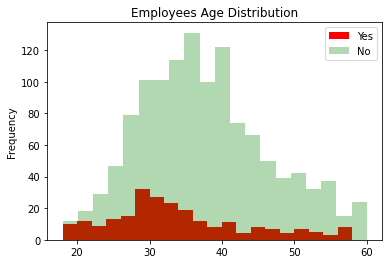

In [111]:
# Checking the Age distribution
distribution('Age', 20)

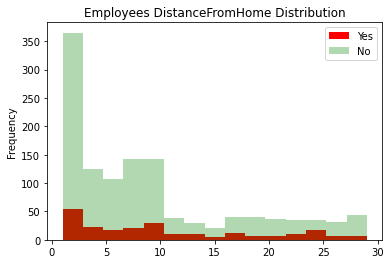

In [112]:
#Exploring the distance from home of the employees
distribution('DistanceFromHome', 15)

From the above image, we can assume that the DistanceFromHome has little or no effect on the attrition since it is almost distributed the same way for each case

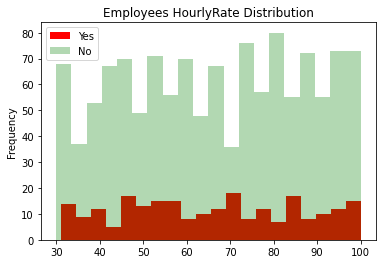

In [113]:
#Exploring the HourlyRate of the employees as this could be a factor
distribution('HourlyRate')

The HourlyRate is distributed in almost the same way for each case

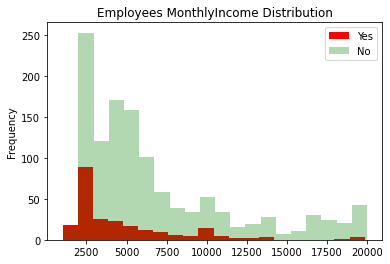

In [114]:
#Explore the Monthly income for each case
distribution('MonthlyIncome')

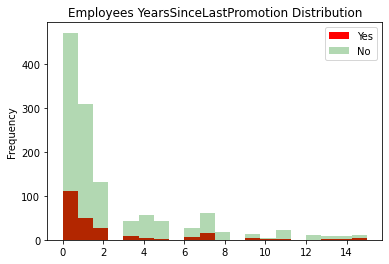

In [115]:
#Explore YearsSinceLastPromotion
distribution('YearsSinceLastPromotion')

<AxesSubplot:xlabel='Attrition,PerformanceRating'>

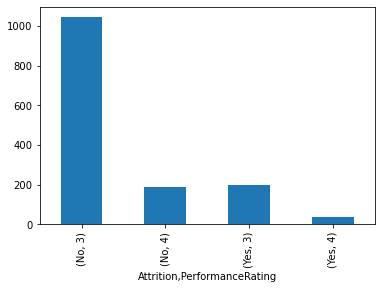

In [116]:
#Exploring the performance rating for each attrite
df.groupby('Attrition')['PerformanceRating'].value_counts().plot.bar()

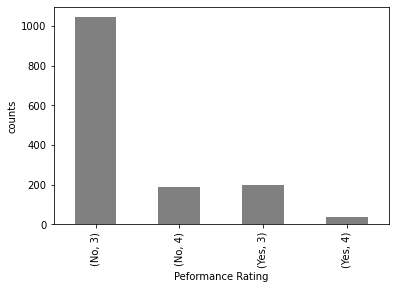

In [117]:
df.groupby('Attrition')['PerformanceRating'].value_counts().plot.bar(color = 'grey')
plt.xlabel('Peformance Rating')
plt.ylabel('counts');

From the above diagram, it shows that even the employees who did not attrit had low ratings, so we can assume it has no way of contributing to it

## Feature Engineering

In [118]:
#converting the target class to binary
df['Attrition'] = (df['Attrition'] == 'Yes').astype(int)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


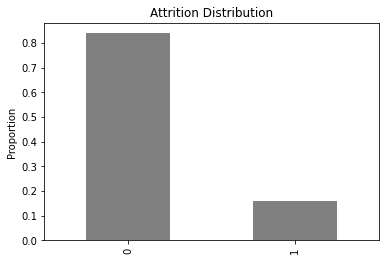

In [119]:
#checking the distribution of the target feature
# checking the distribution of the attrition of the employees
df.Attrition.value_counts(normalize = True).plot.bar(color = 'grey')
plt.title('Attrition Distribution')
plt.ylabel('Proportion');

The above shows that the data is imbalance with the positive class having about 20% while the negative class is having about 80%

In [120]:
#splitting the dataset
X = df.drop(columns = 'Attrition')
y = df['Attrition']


In [121]:
# splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
#Creating a baseline score for the model
baseline_acc = round(df.Attrition.value_counts(normalize = True).max(),2)
baseline_acc

0.84

### Resampling

In [123]:
#oversampling the training dataset
over_samp = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_samp.fit_resample(X_train, y_train)
print(X_train_over.shape)

(1956, 31)


In [124]:
#undersampling the training dataset
under_samp = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_samp.fit_resample(X_train, y_train)
print(X_train_under.shape)

(396, 31)


### Model

In [125]:
#Creating the pipeline for the model
m_real = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    RandomForestClassifier(random_state=42)
)
#training the dataset
m_real.fit(X_train, y_train)

#Creating the pipeline for the oversampling model
m_over = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    RandomForestClassifier(random_state=42)
)
#training the dataset
m_over.fit(X_train_over, y_train_over)
    
#Creating the pipeline for the undersampling model
m_under = make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
    RandomForestClassifier(random_state=42)
)
#training the dataset
m_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [126]:
#Checking the accuracy score of each sample
for m in [m_real, m_over, m_under]:
    train_acc = m.score(X_train, y_train)
    test_acc = m.score(X_test, y_test)
    
    print(f'train_acc : {train_acc}')
    print(f'test_acc : {test_acc}')

train_acc : 1.0
test_acc : 0.8639455782312925
train_acc : 1.0
test_acc : 0.8707482993197279
train_acc : 0.7517006802721088
test_acc : 0.6292517006802721


looking at the above accuracies, even though accuracy do not truly describe how well the model is performing, it shows that the over sampled dataset is better

In [127]:
#Tuning the moel and using cross validation to see the performance
model = make_pipeline(
    OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1),
    RandomForestClassifier(random_state=42)
)

# creating the dictionary for the param
params = {
    'randomforestclassifier__n_estimators': range(10,110,10),
    'randomforestclassifier__max_depth' : range(5,110,10)
}

#creating the cross validation
cls = GridSearchCV(
    estimator=model,
    param_grid=params,
    n_jobs=-1,
    verbose=1,
    cv=5
)



In [128]:
#training the data 
cls.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(handle_unknown='use_encoded_value',
                                                       unknown_value=-1)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(5, 110, 10),
                         'randomforestclassifier__n_estimators': range(10, 110, 10)},
             verbose=1)

In [129]:
#printing the top five best results
pd.DataFrame(cls.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15,0.258907,0.005375,0.023138,0.000977,15,60,"{'randomforestclassifier__max_depth': 15, 'ran...",0.974490,0.976982,0.982097,0.974425,0.971867,0.975972,0.003464,1
28,0.389950,0.003385,0.029322,0.000489,25,90,"{'randomforestclassifier__max_depth': 25, 'ran...",0.982143,0.976982,0.982097,0.966752,0.969309,0.975457,0.006398,2
78,0.509437,0.054201,0.037101,0.001163,75,90,"{'randomforestclassifier__max_depth': 75, 'ran...",0.982143,0.976982,0.982097,0.966752,0.969309,0.975457,0.006398,2
88,0.469544,0.004522,0.034308,0.000798,85,90,"{'randomforestclassifier__max_depth': 85, 'ran...",0.982143,0.976982,0.982097,0.966752,0.969309,0.975457,0.006398,2
68,0.438431,0.010609,0.032709,0.001165,65,90,"{'randomforestclassifier__max_depth': 65, 'ran...",0.982143,0.976982,0.982097,0.966752,0.969309,0.975457,0.006398,2


In [130]:
#best score
round(cls.best_score_,2)

0.98

In [131]:
#best estimator
cls.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, n_estimators=60,
                                        random_state=42))])

### Evaluate

In [132]:
#Evaluating with the test data
round(cls.score(X_test, y_test),2)

0.87

The above accuracy beats the baseline score on the test data, this is an improvement!

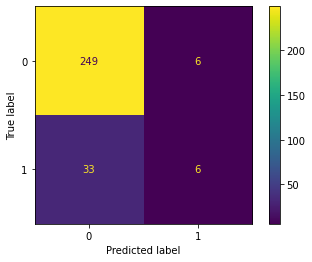

In [133]:
#Display the confused matrix
ConfusionMatrixDisplay.from_estimator(cls,X_test, y_test);

The False Negative is 33 counts while the False Positive is 6 counts

In [134]:
#Displaying the classification Report
print(classification_report(y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.15      0.24        39

    accuracy                           0.87       294
   macro avg       0.69      0.57      0.58       294
weighted avg       0.83      0.87      0.84       294



From the report above, it shows that our model is performing well

### Communicate

In [135]:
#Extracting the feature names
feat_names = X_test.columns
#Extracting the feature importances
feat_importance = cls.best_estimator_.named_steps['randomforestclassifier'].feature_importances_

#storing in a Series form
feat_imp = pd.Series(feat_importance, index=feat_names)
feat_imp.head()

Age                 0.061799
BusinessTravel      0.013732
DailyRate           0.049891
Department          0.010656
DistanceFromHome    0.040578
dtype: float64

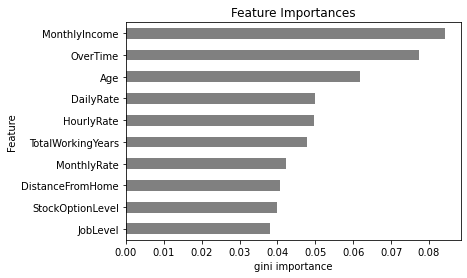

In [136]:
#Displaying the top ten feature importances in a bar chart
feat_imp.sort_values().tail(10).plot(kind = 'barh', color = 'grey')
plt.title('Feature Importances')
plt.ylabel('Feature')
plt.xlabel('gini importance');

The above image shows that MonthlyIncome is the most important in predicting whether an employee will attrite or not, followed by the overtime feature, then their age

In [137]:
#Storing the model
with open('employee_attrition.pkl', 'wb') as f:
    pickle.dump(cls, f)